In [4]:
import cv2
import wrinkle2
import numpy as np
import matplotlib.pyplot as plt
from arcsim_expert_python import *
from regression import *
expert = arcsim_expert()

cloth_x = 1.0 #width of the cloth 
cloth_y = 2.0 #length of the cloth

#loading
data = np.load('./1114-2330/data.npz')
tt_feat = data['tt_feat']
tt_pos = data['tt_pos']
tt_handles = data['tt_handles']
tt_log = data['tt_log']
tt_feat,tt_log = same_size(tt_feat,tt_log)
tt_pos,tt_log = same_size(tt_pos,tt_log)
tt_handles,tt_log = same_size(tt_handles,tt_log)
print tt_log.shape, tt_handles.shape, tt_pos.shape, tt_feat.shape

print data.keys()
expert_controller = expert.expert_flat

tt_expert_pos = np.zeros((tt_pos.shape[0],6))
for i in range(tt_handles.shape[0]):
    handles = tt_handles[i,:]
    expert_pos=expert_controller(handles=handles.reshape(4,3),x=cloth_x,y=cloth_y)
    tt_expert_pos[i,:]=np.array(expert_pos).ravel()
    
tt_pos_delta = np.sum((tt_expert_pos-tt_pos)**2, axis=1)
for run, frame, delta in tt_log:
    #print int(run), int(frame)
    pass

axes = plt.gca()
axes.set_xlabel('time index')
axes.set_ylabel('controller coordinates, m')


# for ind in range(70,80):
#     indices_range = tt_log[:,0].astype(int)==ind 
#     log = tt_log[indices_range]
#     pos_delta = tt_pos_delta[indices_range]
#     plt.plot(range(len(log)),log[:,2],label='movement delta')
#     plt.plot(range(len(log)),pos_delta,label='action difference with expert')
#     plt.legend()
# plt.show()


vis = np.array([])

for ind in range(1,99):
    # train the model:
    indices_range = tt_log[:,0].astype(int)<ind
    feat = tt_feat[indices_range]
    pos = tt_pos[indices_range]
    handles = tt_handles[indices_range]
    
    from rfdic import *
    num_class = len(feat)/30 if len(feat)/30 > 2 else 2
    num_trees = 2
    rt = random_trees(tt_feat=feat, tt_pos=pos, tt_handles=handles, 
                      num_class=num_class, num_trees=num_trees)
    
    from vfdic import *
    vfdic = vfdic(tt_feat=feat, tt_pos=pos)
    # test the model
    indices_range = tt_log[:,0]<=ind
    feat = tt_feat[indices_range]
    pos = tt_pos[indices_range]
    
    act_delta=.0
    act2_delta=.0
    act3_delta=.0
    for i in range(len(feat)):
        act = rt.feat_to_act(feat=feat[i,:])
        act2 = rt.feat_to_pos(feat=feat[i,:])
        act3 = vfdic.feat_to_pos(feat=feat[i,:])
        act_delta = act_delta + np.sum((act-pos[i,:])**2)
        act2_delta = act2_delta + np.sum((act2-pos[i,:])**2)
        act3_delta = act3_delta + np.sum((act3-pos[i,:])**2)
    act_delta = act_delta/len(feat)
    act2_delta = act2_delta/len(feat)
    act3_delta = act3_delta/len(feat)
    vis_item = np.array([ind,act_delta,act2_delta,act3_delta,len(feat)])
    print vis_item
    vis = np.vstack((vis,vis_item)) if vis.size else vis_item
    np.save("vis",vis)


9830
9830
9830
(9830, 3) (9830, 12) (9830, 6) (9830, 1640)
['tt_handles', 'tt_feat', 'tt_pos', 'tt_log']
actural leaf amount 6.0
leaf_amount 6
actual_id length 6
max leaf_id 5
H shape (48, 6)
72
(72, 1640) (72, 6)
[  1.00000000e+00   7.32321932e-02   7.17760744e-02   6.79190515e-02
   1.15000000e+02]
actural leaf amount 11.0
leaf_amount 11
actual_id length 11
max leaf_id 10
H shape (115, 11)
172
(172, 1640) (172, 6)
[   2.            0.9364175     0.8795478     0.56851347  215.        ]
actural leaf amount 26.0
leaf_amount 26
actual_id length 26
max leaf_id 25
H shape (215, 26)
322
(322, 1640) (322, 6)
[  3.00000000e+00   2.02674041e-01   2.42082257e-01   2.38247446e-01
   3.15000000e+02]
actural leaf amount 34.0
leaf_amount 34
actual_id length 34
max leaf_id 33
H shape (315, 34)
472
(472, 1640) (472, 6)
[  4.00000000e+00   2.84104277e-01   3.09226986e-01   2.39178212e-01
   4.15000000e+02]
actural leaf amount 41.0
leaf_amount 41
actual_id length 41
max leaf_id 40
H shape (415, 41)
622

[  3.90000000e+01   1.43691617e-02   1.97950957e-02   3.09593316e-02
   3.83100000e+03]
actural leaf amount 842.0
leaf_amount 842
actual_id length 842
max leaf_id 841
H shape (3831, 842)
5746
(5746, 1640) (5746, 6)


KeyboardInterrupt: 

1
2
3


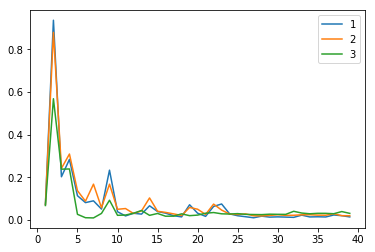

In [8]:
vis = np.load("vis.npy")
for i in range(1,vis.shape[1]-1):
    print i
    plt.plot(vis[:,0], vis[:,i], label=str(i))
plt.legend()
plt.show()

In [10]:
a,b = (1,3)